In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os


In [3]:

# List files in the root directory of Google Drive
drive_path = "/content/drive/My Drive/"
files = os.listdir(drive_path)
print(files)

['Getting started.pdf', 'Kung Fu Panda 3 (2016) 720p BrRip x265_AVADL.BiZ.mkv', 'Kung.Fu.Panda.2008.720p.BrRip.MkvCage.Farda.DL.mkv', 'BBPS_Receipt_IC2109391924.pdf', 'Classroom', ' physics assignment2.pdf', 'SATYARTH 12B PHYSICS.pdf', 'Edited - SATYARTH 12B PHYSICS.pdf', 'CS Project (1).docx', 'CS Project.docx', 'Untitled document (26).gdoc', 'Special ringtone.m4a', 'Available College Options.gsheet', 'queries.gsheet', 'Essential-Grammar-in-Use.pdf', 'Evs Assignment 1.pdf', 'B.Tech. Physics Manual (1st Year).pdf', 'indian monsoon evs assignment.pdf', 'TIPS AND COMMANDS (UBUNTU TERMINAL).gdoc', 'Untitled Jam.gjam', 'Untitled document (25).gdoc', 'Untitled document (24).gdoc', 'Untitled document (23).gdoc', 'previous year assignments and papers', 'question2.gsheet', 'Untitled document (22).gdoc', 'PHYSICS_LAB_JNU', 'PXL_20220216_145511562.jpg', 'PXL_20220216_145444136.RESTORED.jpg', 'PXL_20220216_145416041.jpg', '2111EC014-Satyarth_math_assignment1.pdf', 'Resume (1).gdoc', 'Resume.gdoc'

In [4]:
import shutil
import zipfile

# Path to the ZIP file in your Google Drive
zip_file_path = "/content/drive/My Drive/pcos_train.zip"

# Path to the directory where you want to extract the contents
extract_path = "/content/"

# Copy the ZIP file from Google Drive to Colab
shutil.copy(zip_file_path, "/content/")

# Unzip the file while preserving directory structure
with zipfile.ZipFile("/content/pcos_train.zip", "r") as zip_ref:
    zip_ref.extractall(extract_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extract_path)
print("Files extracted successfully:")
for file in extracted_files:
    print(os.path.join(extract_path, file))

Files extracted successfully:
/content/.config
/content/drive
/content/Inception.Keras
/content/pcos_train
/content/pcos_train.zip
/content/sample_data


In [ ]:
%pip install tensorflow opencv-python matplotlib

In [ ]:
%pip install tensorflow opencv-python matplotlib

In [5]:
import tensorflow as tf
import os

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [7]:
train_data_dir='pcos_train/PCOS_Train'
os.listdir(train_data_dir)

['healthy', 'unhealthy']

In [8]:
healthyDirectory=os.listdir(os.path.join(train_data_dir,os.listdir(train_data_dir)[0]))
healthyDirectory

['image3678.jpg',
 'image2962.jpg',
 'image0865.jpg',
 'image3646.jpg',
 '91image78.jpg',
 'image2597.jpg',
 '16image34.jpg',
 'image2706.jpg',
 'image1940.jpg',
 'image2989.jpg',
 'image3272.jpg',
 'image0457.jpg',
 'image3522.jpg',
 'image3467.jpg',
 'image3455.jpg',
 'image3163.jpg',
 '22image0032.jpg',
 'image2437.jpg',
 'image2809.jpg',
 'image3616.jpg',
 'image2785.jpg',
 'image2462.jpg',
 '10image41.jpg',
 'image1967.jpg',
 'image3531.jpg',
 '15image12.jpg',
 'image3294.jpg',
 'pco_14.jpg',
 'image2754.jpg',
 'image0455.jpg',
 'image3099.jpg',
 'image3263.jpg',
 'image3088.jpg',
 'image1676.jpg',
 'image3052.jpg',
 'image3087.jpg',
 'image3614.jpg',
 'image3327.jpg',
 'image2572.jpg',
 'image3478.jpg',
 'image1470.jpg',
 '163image42.jpg',
 'image3316.jpg',
 '93image50.jpg',
 'image2940.jpg',
 'image2854.jpg',
 'image2999.jpg',
 '100image13.jpg',
 'image0431.jpg',
 'image2988.jpg',
 'image2735.jpg',
 'image3329.jpg',
 'image2753.jpg',
 'image2374.jpg',
 'normal_24.jpg',
 'image19

[[[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 ...

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[10 10 10]
  [10 10 10]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]]
(300, 300, 3)


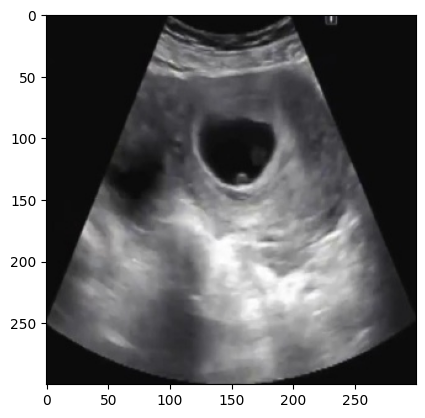

In [9]:
# an example of how the images are inside the folders healthy and unhealthy
exampleImage=cv2.imread(os.path.join(train_data_dir,'healthy', '1image40.jpg'))
print(exampleImage)
print(exampleImage.shape)
# plt.imshow(exampleImage)
plt.imshow(cv2.cvtColor(exampleImage, cv2.COLOR_BGR2RGB))

In [10]:
# trainData=tf.keras.utils.image_dataset_from_directory('PCOS_Train',
#                                                       image_size=(256,256),
#                                                       batch_size=32,
#                                                       label_mode='categorical',
#                                                       seed=123,
#                                                       shuffle=True)

trainData=tf.keras.utils.image_dataset_from_directory(train_data_dir)
dataIterator=trainData.as_numpy_iterator()
batch=dataIterator.next()
batch

Found 3200 files belonging to 2 classes.


(array([[[[1.69746323e+01, 1.69746323e+01, 1.69746323e+01],
          [8.98442078e+00, 8.98442078e+00, 8.98442078e+00],
          [6.04878998e+00, 6.04878998e+00, 6.04878998e+00],
          ...,
          [9.97269440e+00, 9.97269440e+00, 9.97269440e+00],
          [1.19882927e+01, 1.19882927e+01, 1.19882927e+01],
          [1.99746284e+01, 1.99746284e+01, 1.99746284e+01]],
 
         [[1.19492874e+01, 1.19492874e+01, 1.19492874e+01],
          [9.99420929e+00, 9.99420929e+00, 9.99420929e+00],
          [1.10193596e+01, 1.10193596e+01, 1.10193596e+01],
          ...,
          [1.09961510e+01, 1.09961510e+01, 1.09961510e+01],
          [1.19941750e+01, 1.19941750e+01, 1.19941750e+01],
          [1.49590530e+01, 1.49590530e+01, 1.49590530e+01]],
 
         [[3.99808502e+00, 3.99808502e+00, 3.99808502e+00],
          [8.02722931e+00, 8.02722931e+00, 8.02722931e+00],
          [1.09800873e+01, 1.09800873e+01, 1.09800873e+01],
          ...,
          [1.19903297e+01, 1.19903297e+01, 1.1990

In [11]:
trainData

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
# each batch is of size 32 and has 2 parts. the first part is the images and the second part is the labels
batch[0]
batch[0].shape
# batch[1]

(32, 256, 256, 3)

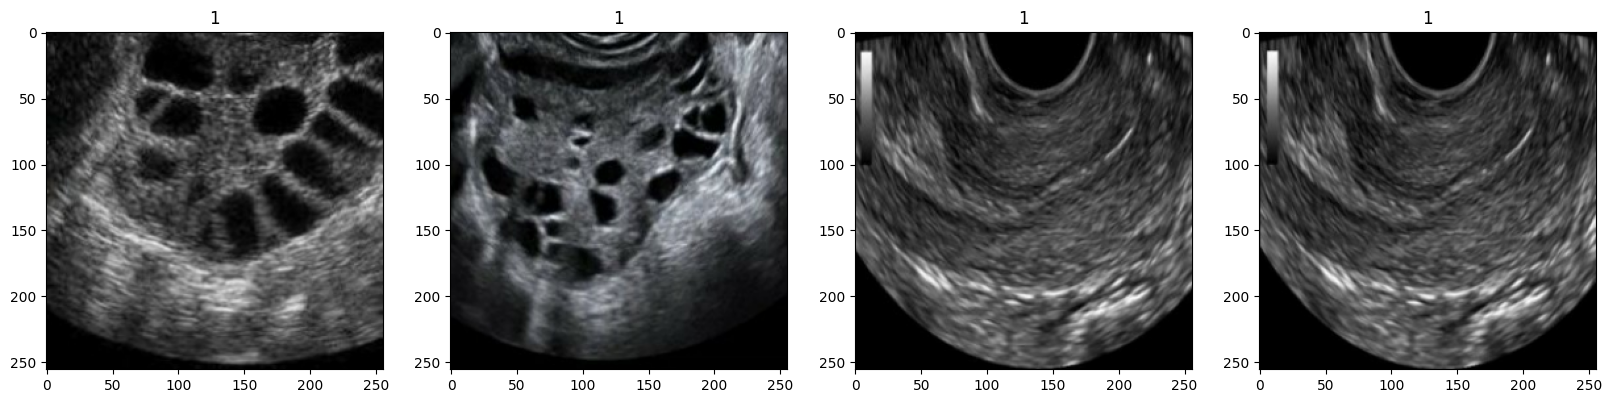

In [13]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    # print(os.path.abspath(img))

In [14]:
for i, class_name in enumerate(trainData.class_names):
    print(f"Label for class {class_name}: {i}")

Label for class healthy: 0
Label for class unhealthy: 1


In [15]:
trainData=trainData.map(lambda x,y: (x/255,y))

In [16]:
scaledIterator=trainData.as_numpy_iterator()

In [17]:
scaledIterator.next()[0].max()

1.0

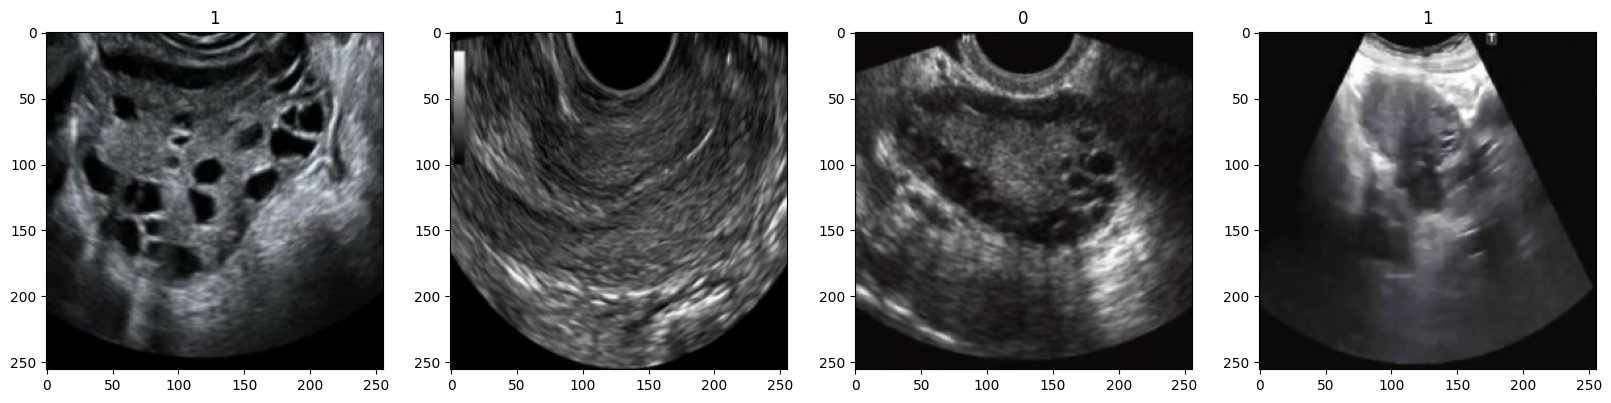

In [18]:
batch=scaledIterator.next()
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    # print(os.path.abspath(img))

In [19]:
batch[0].max()
batch[0].min()

0.0

In [20]:
len(trainData)

100

In [21]:
trainSize=int(len(trainData)*.7)
valSize=int(len(trainData)*.2)+1
testSize=int(len(trainData)*.1)+1

In [22]:
valSize
trainSize
testSize

11

In [23]:

train=trainData.take(trainSize)
val=trainData.skip(trainSize).take(valSize)
test=trainData.skip(trainSize+valSize).take(testSize)

# train=trainData.take(len(trainData))
# val=trainData.take(valSize)
# test=trainData.take(testSize)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [25]:
# from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2S

# NUM_CLASSES = 2
# IMG_SIZE = 224
# size = (IMG_SIZE, IMG_SIZE)


# inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# # Using model without transfer learning

# outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [26]:
# Load the InceptionV3 model with the correct input shape
base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [27]:


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(
    train,
    steps_per_epoch=len(train),
    epochs=100,
    validation_data=val,
    validation_steps=len(val),
    callbacks=[callback]
)

Epoch 1/100
70/70 [==============================] - 155s 784ms/step - loss: 0.5350 - accuracy: 0.7263 - val_loss: 0.5998 - val_accuracy: 0.6994
Epoch 2/100
70/70 [==============================] - 51s 725ms/step - loss: 0.4819 - accuracy: 0.7437 - val_loss: 0.6147 - val_accuracy: 0.6994
Epoch 3/100
70/70 [==============================] - 51s 720ms/step - loss: 0.4794 - accuracy: 0.7589 - val_loss: 0.6717 - val_accuracy: 0.7128
Epoch 4/100
70/70 [==============================] - 51s 727ms/step - loss: 0.4439 - accuracy: 0.7647 - val_loss: 0.5037 - val_accuracy: 0.7202
Epoch 5/100
70/70 [==============================] - 53s 748ms/step - loss: 0.4443 - accuracy: 0.7688 - val_loss: 0.5031 - val_accuracy: 0.7292
Epoch 6/100
70/70 [==============================] - 51s 725ms/step - loss: 0.4516 - accuracy: 0.7710 - val_loss: 0.5906 - val_accuracy: 0.7351
Epoch 7/100
70/70 [==============================] - 51s 726ms/step - loss: 0.4424 - accuracy: 0.7746 - val_loss: 0.6012 - val_accuracy

In [28]:
history.history

{'loss': [0.5349968075752258,
  0.4819362163543701,
  0.4794144630432129,
  0.4439174234867096,
  0.44425728917121887,
  0.45159754157066345,
  0.4423865079879761,
  0.425081729888916,
  0.42286935448646545,
  0.41878843307495117,
  0.404634028673172,
  0.4035235643386841,
  0.4010648727416992,
  0.3974875211715698,
  0.3749011754989624,
  0.36266395449638367,
  0.37526053190231323,
  0.3574906885623932,
  0.34536129236221313,
  0.3351585865020752,
  0.3194262683391571,
  0.31438568234443665,
  0.29591166973114014,
  0.26013460755348206,
  0.26018252968788147,
  0.2382226437330246,
  0.2362469881772995,
  0.18981625139713287,
  0.15914753079414368,
  0.1512775719165802,
  0.1136866956949234,
  0.12791630625724792,
  0.10466741770505905,
  0.08603314310312271,
  0.08123694360256195,
  0.07906308025121689,
  0.08287343382835388,
  0.0996314287185669,
  0.08884086459875107],
 'accuracy': [0.7263392806053162,
  0.7437499761581421,
  0.7589285969734192,
  0.7647321224212646,
  0.76875001192

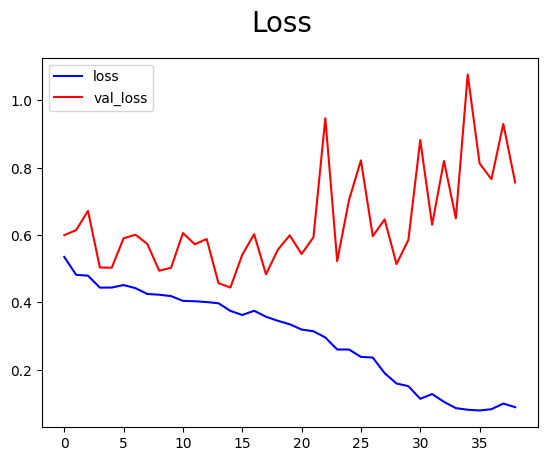

In [29]:
fig=plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

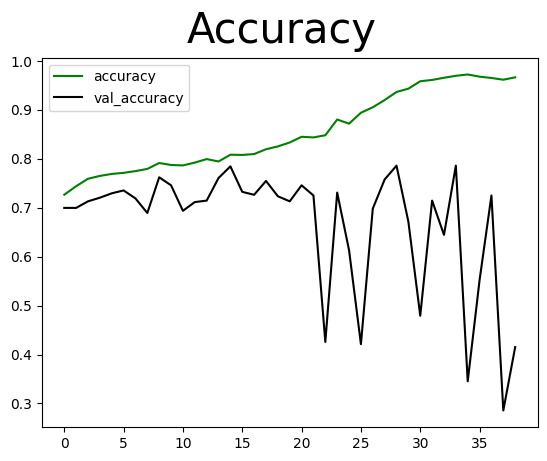

In [30]:
secondFig=plt.figure()
plt.plot(history.history['accuracy'], color='green', label='accuracy')
plt.plot(history.history['val_accuracy'], color='black', label='val_accuracy')
secondFig.suptitle("Accuracy", fontsize=30)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
precision=Precision()
recall=Recall()
accuracy=BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yPred=model.predict(x)
    precision.update_state(y,yPred)
    recall.update_state(y, yPred)
    accuracy.update_state(y, yPred)

1/1 [==============================] - 0s 48ms/step


In [34]:
print(f"Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}")

Precision:0.7124999761581421, Recall:0.2780487835407257, Accuracy:0.40625


In [35]:
model.save("Inception.Keras")